In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import storage
from io import StringIO
from matplotlib.ticker import FuncFormatter
import numpy as np

In [18]:
gclient = storage.Client.from_service_account_json('key.json')

In [19]:
bucket = gclient.bucket('lavoura_permanente')
blobs = bucket.list_blobs()
single_blob = next(blobs)
df = pd.read_csv(StringIO(single_blob.download_as_text()))

print(df.head())
# for blob in blobs:
#     b: Blob = blob
#     data = pd.DataFrame(StringIO(b.download_as_string()))
#     print(data.head())

    ano sigla_uf  id_municipio               produto  area_destinada_colheita  \
0  1978       AC       1200054        Banana (cacho)                      NaN   
1  1978       AC       1200104        Banana (cacho)                      NaN   
2  1978       AC       1200104  Café (em grão) Total                      NaN   
3  1978       AC       1200203  Café (em grão) Total                      NaN   
4  1978       AC       1200203               Abacate                      NaN   

   area_colhida  quantidade_produzida  rendimento_medio_producao  \
0          22.0                 265.2                 12054.5455   
1         121.0                1468.8                 12138.8430   
2           6.0                   8.0                  1333.0000   
3         121.0                  42.0                   347.0000   
4          14.0                 212.8                 15200.0000   

   valor_producao  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4   

In [10]:

df = df.dropna(subset='area_colhida')
df = df.dropna(subset='quantidade_produzida')
df = df[df['ano'] == 2014]
x_axis = df[df['area_colhida'] <= 5000]['area_colhida']
y_axis = df[df['area_colhida'] <= 5000]['quantidade_produzida']

print(len(x_axis))

2709


In [15]:
coef = np.polyfit(x_axis, y_axis, 1)
m, b = coef
print(f"Coeficiente angular={m}")
print(f"Intercepto={b}")
x_vals = np.array(x_axis)
y_vals = m * x_vals + b

Coeficiente angular=26.377060165241378
Intercepto=-184.83275428120285


In [12]:
def formatar_milhar(valor, pos):
    return f'{int(valor):,}'.replace(',', '.')

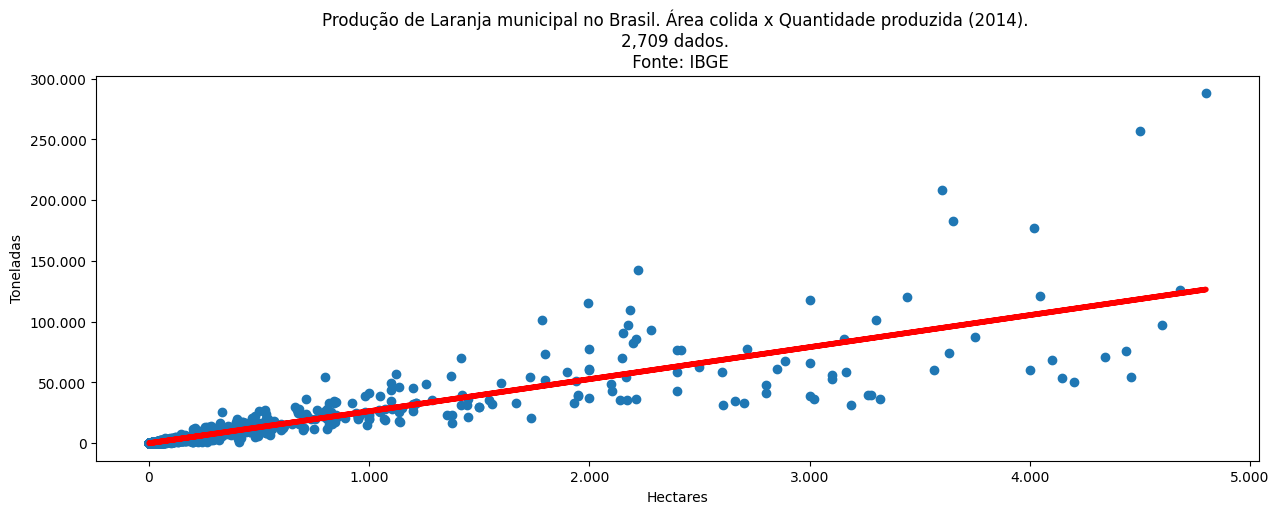

In [14]:

df = df[df['produto'] == 'Laranja']


plt.figure(figsize=(15, 5))
plt.scatter(x_axis, y_axis)
plt.plot(x_vals, y_vals, color='red', linewidth=4, label='Regressão Linear')
plt.title(f'Produção de Laranja municipal no Brasil. Área colida x Quantidade produzida (2014). \n{len(x_axis):,} dados. \n Fonte: IBGE')
plt.ylabel('Toneladas')
plt.xlabel('Hectares')
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_milhar))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_milhar))
